In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_1.csv
/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv
/kaggle/input/unsw-nb15/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/unsw-nb15/UNSW-NB15_4.csv
/kaggle/input/unsw-nb15/UNSW-NB15_3.csv
/kaggle/input/unsw-nb15/UNSW-NB15_2.csv
/kaggle/input/unsw-nb15/NUSW-NB15_features.csv


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  si

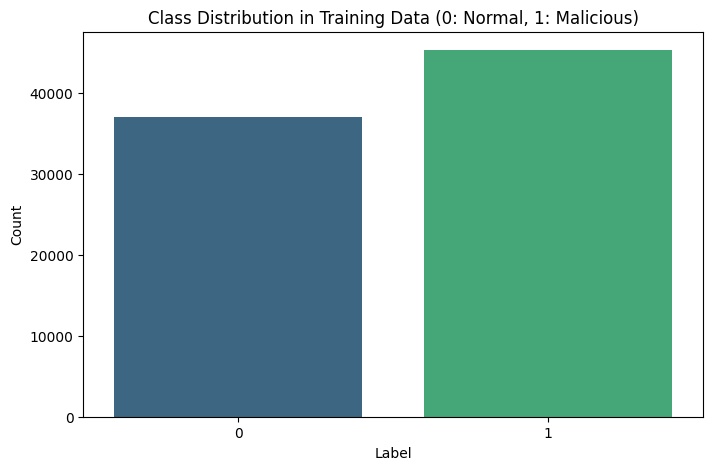

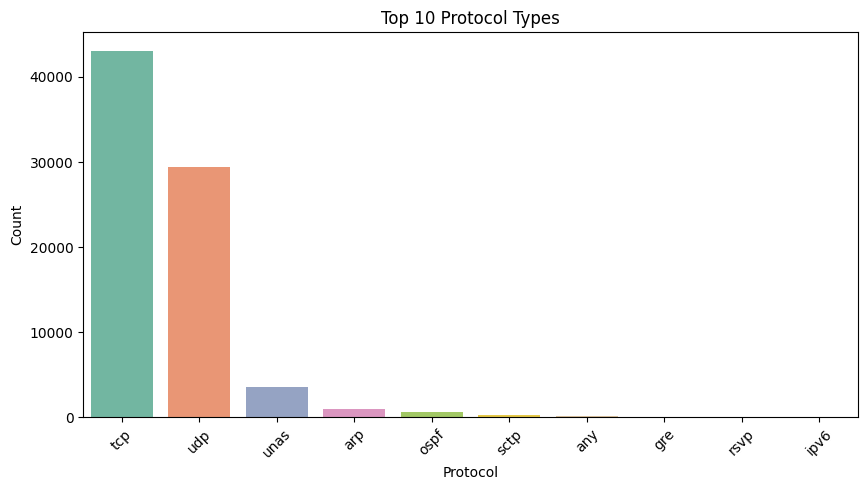

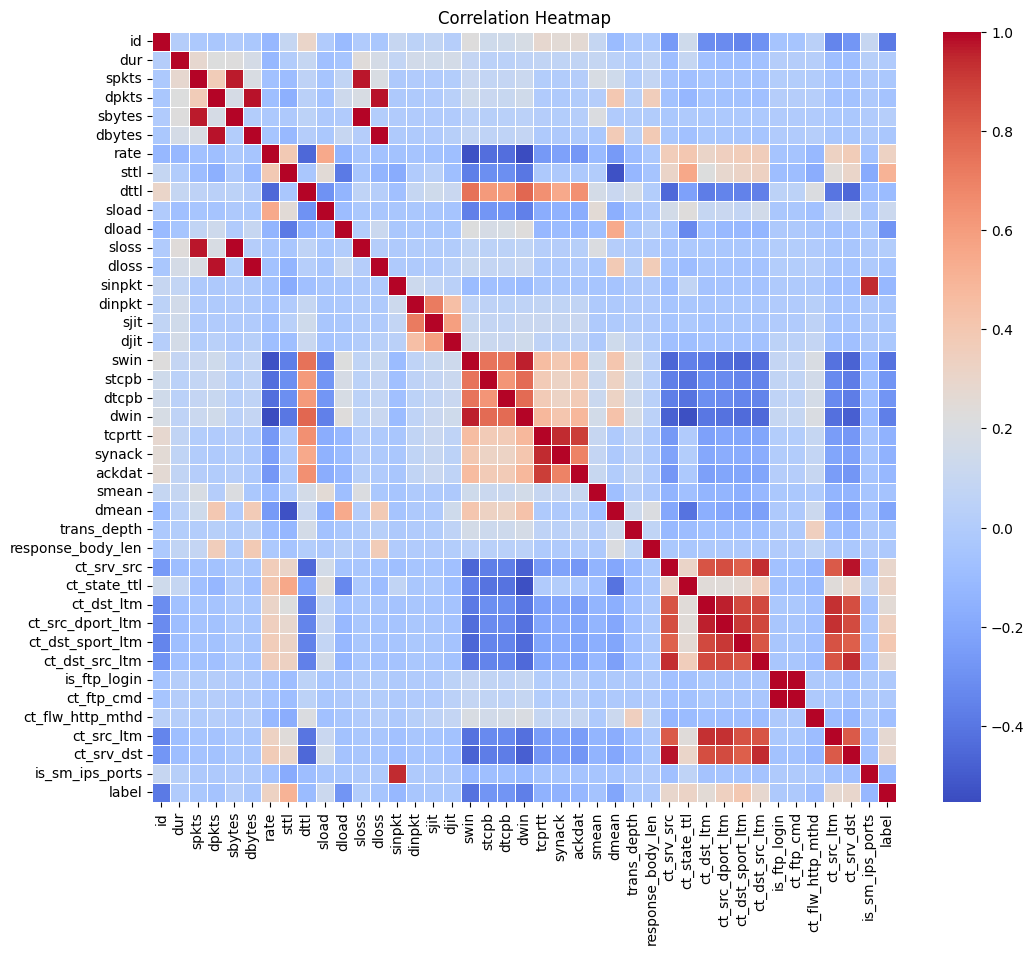

In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Data preprocessing function
def preprocess_data(data):
    data = data.drop(["id", "attack_cat"], axis=1, errors="ignore")  # Drop irrelevant columns
    label_encoder = LabelEncoder()
    for column in data.select_dtypes(include=["object"]).columns:
        data[column] = label_encoder.fit_transform(data[column])
    scaler = MinMaxScaler()
    data[data.columns] = scaler.fit_transform(data)
    return data

# Load your dataset here (train_data and test_data)
train_path = "/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv"
test_path = "/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Preprocess training data
X_train = preprocess_data(train_data.drop("label", axis=1))
y_train = train_data["label"]


# Display basic info
print("Training Data Info:")
print(train_data.info())

print("\nSample Training Data:")
print(train_data.head())

# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x="label", palette="viridis")
plt.title("Class Distribution in Training Data (0: Normal, 1: Malicious)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Visualize protocol types
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x="proto", order=train_data["proto"].value_counts().index[:10], palette="Set2")
plt.title("Top 10 Protocol Types")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap
numeric_columns = train_data.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = train_data[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
X_train.shape

(82332, 42)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2059/2059 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0334 - val_loss: 0.0064
Epoch 2/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0019 - val_loss: 0.0046
Epoch 3/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0012 - val_loss: 0.0040
Epoch 4/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 8.9143e-04 - val_loss: 0.0039
Epoch 5/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6.9181e-04 - val_loss: 0.0035
Epoch 6/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5.8993e-04 - val_loss: 0.0034
Epoch 7/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.5626e-04 - val_loss: 0.0032
Epoch 8/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 5.1228e-04 - val_loss: 0.0031
Epoch 9/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.8398e-04 - val_loss: 0.0031
Epoch 10/10
2059/2059 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.6022e-04 - val_loss: 0.0030


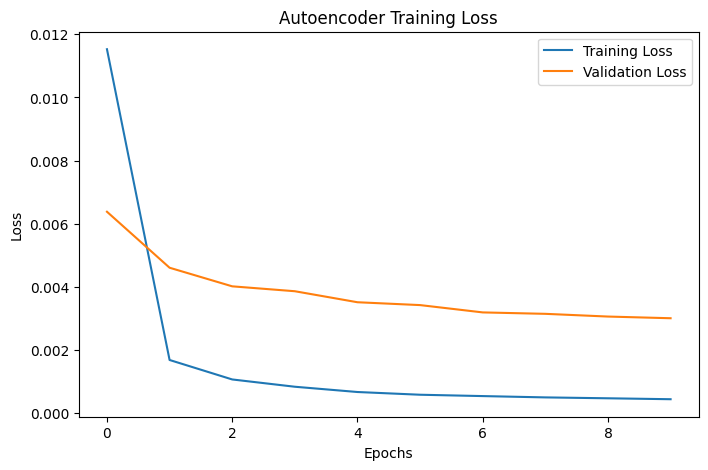

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 3s 981us/step
Anomaly Threshold: 0.0012826010617595636
Number of anomalies detected: 4117


In [15]:

# Build autoencoder


autoencoder = Sequential([
   
    Dense(64, activation="relu" , input_dim=X_train.shape[1]),
    Dense(32, activation="relu", input_dim=X_train.shape[1]),
    Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    Dense(X_train.shape[1], activation="sigmoid")
])

# Compile and fit the autoencoder
autoencoder.compile(optimizer="adam", loss="mse")
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Autoencoder Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Reconstruction loss for anomaly detection 
reconstruction_loss = np.mean(np.square(X_train - autoencoder.predict(X_train)), axis=1)
threshold = np.percentile(reconstruction_loss, 95)  # Set threshold as 95th percentile
print(f"Anomaly Threshold: {threshold}")

anomalies = (reconstruction_loss > threshold).astype(int)
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82     56000
           1       0.96      0.84      0.90    119341

    accuracy                           0.87    175341
   macro avg       0.85      0.89      0.86    175341
weighted avg       0.89      0.87      0.87    175341



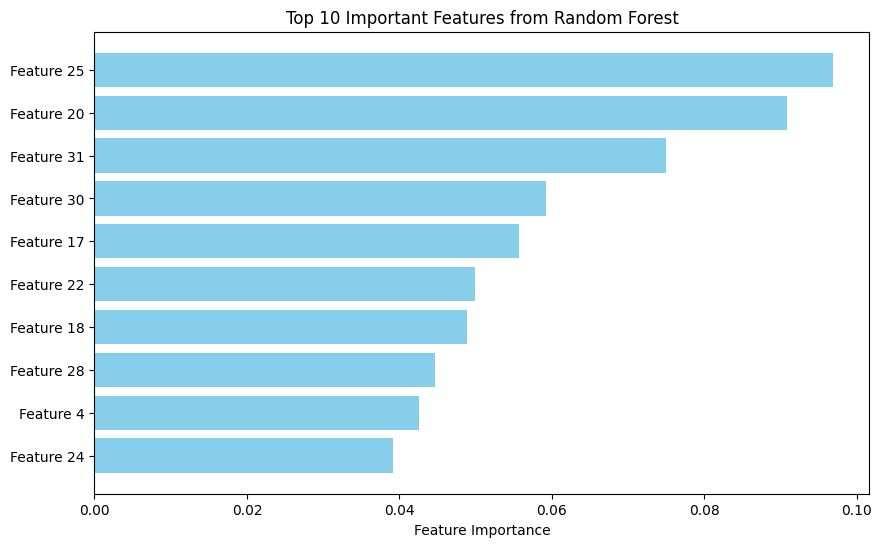

2573/2573 ━━━━━━━━━━━━━━━━━━━━ 3s 999us/step
Anomaly Threshold: 0.0012826010617595636


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


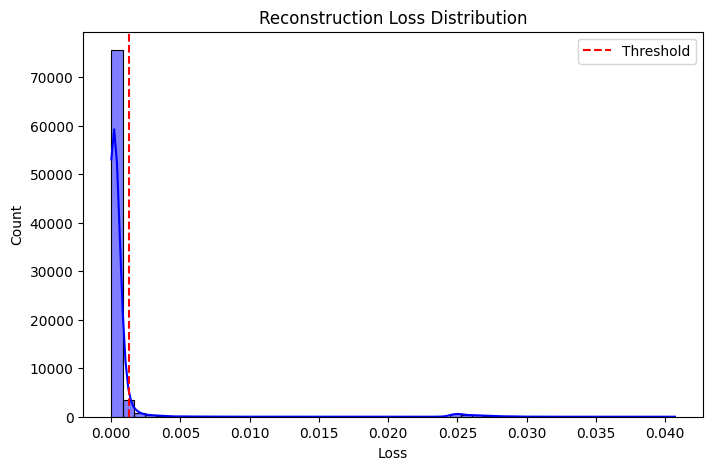

In [16]:
X_train_encoded = autoencoder.layers[1](autoencoder.layers[0](X_train)).numpy()

# Preprocess test data (assuming test_data is defined)
X_test = preprocess_data(test_data.drop("label", axis=1))
y_test = test_data["label"]

# Extract features from test data using the same method
X_test_encoded = autoencoder.layers[1](autoencoder.layers[0](X_test)).numpy()

# Train Random Forest Classifier on encoded features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_encoded)

# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize feature importance
feature_importance = rf_model.feature_importances_
features = [f"Feature {i+1}" for i in range(X_train_encoded.shape[1])]  # Naming encoded features
sorted_idx = np.argsort(feature_importance)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features from Random Forest")
plt.show()

# Optional: Reconstruction loss for anomaly detection (if needed)
reconstruction_loss = np.mean(np.square(X_train - autoencoder.predict(X_train)), axis=1)
threshold = np.percentile(reconstruction_loss, 95)  # Set threshold as 95th percentile
print(f"Anomaly Threshold: {threshold}")

# Optional: Visualize reconstruction loss distribution (if needed)
plt.figure(figsize=(8, 5))
sns.histplot(reconstruction_loss, bins=50, kde=True, color="blue")
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.title("Reconstruction Loss Distribution")
plt.xlabel("Loss")
plt.ylabel("Count")
plt.legend()
plt.show()

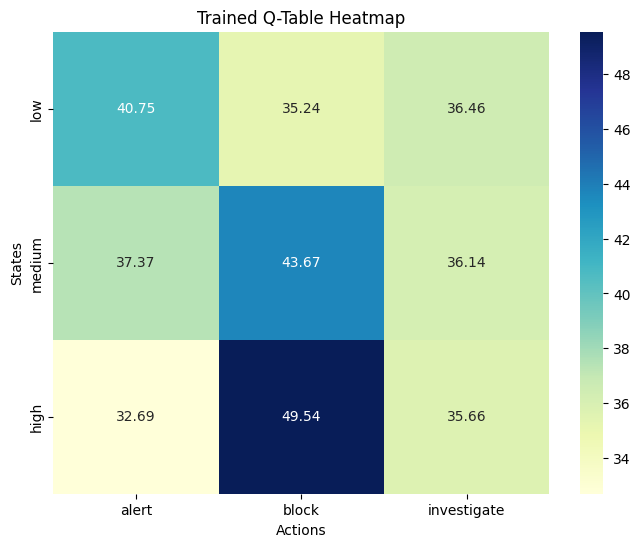

In [6]:


# Visualizing Q-Table
q_table_df = pd.DataFrame(q_table, index=states, columns=actions)
plt.figure(figsize=(8, 6))
sns.heatmap(q_table_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Trained Q-Table Heatmap")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()


In [ ]:
from sklearn.svm import SVC  # Import SVM

# Train SVM Classifier on encoded features
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel to 'rbf' for non-linear SVM
svm_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_encoded)

# Classification metrics
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Visualize feature importance (SVM doesn't have a straightforward feature importance, but we can use the coefficients for linear kernel)
if svm_model.kernel == 'linear':
    feature_importance_svm = np.abs(svm_model.coef_[0])
    sorted_idx_svm = np.argsort(feature_importance_svm)[-10:]  # Top 10 features

    plt.figure(figsize=(10, 6))
    plt.barh(np.array(features)[sorted_idx_svm], feature_importance_svm[sorted_idx_svm], color="skyblue")
    plt.xlabel("Feature Importance (SVM)")
    plt.title("Top 10 Important Features from SVM")
    plt.show()

# Optional: Reconstruction loss for anomaly detection (if needed)
reconstruction_loss = np.mean(np.square(X_train - autoencoder.predict(X_train)), axis=1)
threshold = np.percentile(reconstruction_loss, 95)  # Set threshold as 95th percentile
print(f"Anomaly Threshold: {threshold}")

# Optional: Visualize reconstruction loss distribution (if needed)
plt.figure(figsize=(8, 5))
sns.histplot(reconstruction_loss, bins=50, kde=True, color="blue")
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.title("Reconstruction Loss Distribution")
plt.xlabel("Loss")
plt.ylabel("Count")
plt.legend()
plt.show()


In [ ]:
from xgboost import XGBClassifier  # Import XGBoost

# Train XGBoost Classifier on encoded features
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_encoded)

# Classification metrics
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Visualize feature importance
feature_importance_xgb = xgb_model.feature_importances_
sorted_idx_xgb = np.argsort(feature_importance_xgb)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx_xgb], feature_importance_xgb[sorted_idx_xgb], color="skyblue")
plt.xlabel("Feature Importance (XGBoost)")
plt.title("Top 10 Important Features from XGBoost")
plt.show()

# Optional: Reconstruction loss for anomaly detection (if needed)
reconstruction_loss = np.mean(np.square(X_train - autoencoder.predict(X_train)), axis=1)
threshold = np.percentile(reconstruction_loss, 95)  # Set threshold as 95th percentile
print(f"Anomaly Threshold: {threshold}")

# Optional: Visualize reconstruction loss distribution (if needed)
plt.figure(figsize=(8, 5))
sns.histplot(reconstruction_loss, bins=50, kde=True, color="blue")
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.title("Reconstruction Loss Distribution")
plt.xlabel("Loss")
plt.ylabel("Count")
plt.legend()
plt.show()
